In [1]:
from __future__ import print_function, division
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
gpa = pd.read_csv("../data/GPA.csv")
transfers = pd.read_csv("../data/Transfers.csv")
freshmen = pd.read_csv("../data/Freshmen.csv")

In [3]:
gpa.head()

,﻿Calculation1,Campus,City,County/State/Country,Fall Term,Level,School,Adm GPA (SUM),App GPA (SUM),Enrl GPA (SUM)
0,GERMAN SWISS INTERNATIONAL SCH670905,Berkeley,n/a,HONG KONG,2012,Freshman,GERMAN SWISS INTERNATIONAL SCH,NaN,3.604000,NaN
1,AQUINAS HIGH SCHOOL052772,Riverside,San Bernardino,San Bernardino,1995,Freshman,AQUINAS HIGH SCHOOL,NaN,3.361429,NaN
2,DESIGN SCIENCE HIGH SCHOOL054003,Los Angeles,Fresno,Fresno,2012,Freshman,DESIGN SCIENCE HIGH SCHOOL,NaN,3.818000,NaN
3,BLOOMFIELD HILLS HIGH SCHOOL232447,Universitywide,Bloomfield Twp,Michigan,2015,Freshman,BLOOMFIELD HILLS HIGH SCHOOL,3.942,3.950000,NaN
4,A B MILLER HIGH SCHOOL050944,Santa Barbara,Fontana,San Bernardino,1998,Freshman,A B MILLER HIGH SCHOOL,NaN,3.518571,NaN


In [4]:
transfers.head()

,﻿Calculation1,Campus,City,County/State/ Territory,Fall Term,School,Sch Src TR,Uad Uc Ethn 6 Cat,adm (SUM),app (SUM),enr (SUM)
0,BUTTE COLLEGE4226,Davis,Oroville,Butte,2007,BUTTE COLLEGE,California Community Colleges (CCC),White,22.0,32,4.0
1,IMPERIAL VALLEY COLLEGE4358,Riverside,Imperial,Imperial,2008,IMPERIAL VALLEY COLLEGE,California Community Colleges (CCC),Hispanic/ Latino,13.0,27,3.0
2,ALLAN HANCOCK COLLEGE4002,Universitywide,Santa Maria,Santa Barbara,2012,ALLAN HANCOCK COLLEGE,California Community Colleges (CCC),White,97.0,133,65.0
3,AMERICAN RIVER COLLEGE4004,Berkeley,Sacramento,Sacramento,1996,AMERICAN RIVER COLLEGE,California Community Colleges (CCC),Hispanic/ Latino,8.0,14,6.0
4,CUESTA COLLEGE4101,Santa Barbara,San Luis Obispo,San Luis Obispo,2013,CUESTA COLLEGE,California Community Colleges (CCC),All,122.0,262,42.0


In [5]:
freshmen.head()

,﻿Calculation1,Campus,City,County/State/ Territory,Fall Term,School,Sch Src FR,Uad Uc Ethn 6 Cat,adm (SUM),app (SUM),enr (SUM)
0,F BRAVO MEDICAL MAGNET HS51719,Riverside,Los Angeles,Los Angeles,2008,F BRAVO MEDICAL MAGNET HS,California Public High School,Hispanic/ Latino,39.0,50,10.0
1,ARAGON HIGH SCHOOL53163,Santa Barbara,San Mateo,San Mateo,2012,ARAGON HIGH SCHOOL,California Public High School,Asian,28.0,53,4.0
2,ETIWANDA HIGH SCHOOL50888,San Diego,Etiwanda,San Bernardino,2012,ETIWANDA HIGH SCHOOL,California Public High School,Asian,11.0,34,4.0
3,UPLAND HIGH SCHOOL53586,Merced,Upland,San Bernardino,2005,UPLAND HIGH SCHOOL,California Public High School,Asian,6.0,7,NaN
4,MORNINGSIDE HIGH SCHOOL51262,Los Angeles,Inglewood,Los Angeles,2006,MORNINGSIDE HIGH SCHOOL,California Public High School,All,5.0,22,NaN


Amount of unique schools per table

In [6]:
gpa_school = gpa["School"].unique()
len(gpa_school)

6014

In [7]:
transfers_school = transfers["School"].unique()
len(transfers_school)

591

In [8]:
freshmen_school = freshmen["School"].unique()
len(freshmen_school)

4911

Number of unique GPAs per table

In [9]:
gpa_terms = gpa["Fall Term"].unique()
len(gpa_terms)

24

In [10]:
transfers_terms = transfers["Fall Term"].unique()
len(transfers_terms)

24

In [11]:
freshmen_terms = freshmen["Fall Term"].unique()
len(freshmen_terms)

24

Checks which schools are in the GPA, Freshmen, and Transfers tables

In [12]:
all3 = []
for x in gpa_school:
    if x in transfers_school and x in freshmen_school:
        all3.append(x)
len(all3)

36

Check which schools are in only two of the tables

In [13]:
g_t = []
for x in gpa_school:
    if x in transfers_school:
        g_t.append(x)
len(g_t)

553

In [14]:
g_f = []
for x in gpa_school:
    if x in freshmen_school:
        g_f.append(x)
len(g_f)

4707

In [15]:
t_f = []
for x in transfers_school:
    if x in freshmen_school:
        t_f.append(x)
len(t_f)

36

Checks which schools are in only one of the tables

In [16]:
just_g = []
for x in gpa_school:
    if x not in transfers_school and x not in freshmen_school:
        just_g.append(x)
len(just_g)

790

In [17]:
just_t = []
for x in transfers_school:
    if x not in gpa_school and x not in freshmen_school:
        just_t.append(x)
len(just_t)

38

In [18]:
just_f = []
for x in freshmen_school:
    if x not in gpa_school and x not in transfers_school:
        just_f.append(x)
len(just_f)

204

Locations with largest number of admits per table

In [48]:
gpa_unique_count = gpa.groupby(["County/State/Country"]).count().sort_values(by="City", ascending=False)
gpa_unique_count.head()

,﻿Calculation1,Campus,City,Fall Term,Level,School,Adm GPA (SUM),App GPA (SUM),Enrl GPA (SUM)
County/State/Country,,,,,,,,,
Los Angeles,71770,71770,71770,71770,71770,71770,54359,71770,23965
San Diego,19804,19804,19804,19804,19804,19804,16029,19804,7368
Orange,19773,19773,19773,19773,19773,19773,17093,19773,9040
Santa Clara,13514,13514,13514,13514,13514,13514,11802,13514,6194
Alameda,12830,12830,12830,12830,12830,12830,10171,12830,5067


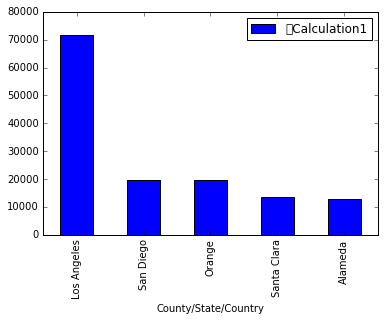

In [73]:
gpa_unique_dropped = gpa_unique_count.drop(['Campus', 'City', 'Fall Term', 'Level', 'School', 'Adm GPA (SUM)', 'App GPA (SUM)', 'Enrl GPA (SUM)'], axis=1)
gpa_unique_dropped[0:5].plot.bar()

In [74]:
transfers_unique_count = transfers.groupby(["County/State/ Territory"]).count().sort_values(by="City", ascending=False)
transfers_unique_count.head()

,﻿Calculation1,Campus,City,Fall Term,School,Sch Src TR,Uad Uc Ethn 6 Cat,adm (SUM),app (SUM),enr (SUM)
County/State/ Territory,,,,,,,,,,
Los Angeles,22482,22482,22482,22482,22482,22482,22482,19550,22482,12670
Orange,9504,9504,9504,9504,9504,9504,9504,8445,9504,5834
San Diego,8218,8218,8218,8218,8218,8218,8218,7070,8218,4697
Alameda,6686,6686,6686,6686,6686,6686,6686,5957,6686,3661
Santa Clara,6119,6119,6119,6119,6119,6119,6119,5472,6119,3661


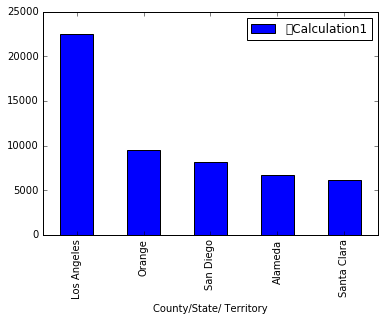

In [77]:
transfers_unique_dropped = transfers_unique_count.drop(['Campus', 'City', 'Fall Term', 'School', 'Sch Src TR', 'Uad Uc Ethn 6 Cat', 'adm (SUM)', 'app (SUM)', 'enr (SUM)'], axis=1)
transfers_unique_dropped[0:5].plot.bar()

In [78]:
freshmen_unique_count = freshmen.groupby(["County/State/ Territory"]).count().sort_values(by="City", ascending=False)
freshmen_unique_count.head()

,﻿Calculation1,Campus,City,Fall Term,School,Sch Src FR,Uad Uc Ethn 6 Cat,adm (SUM),app (SUM),enr (SUM)
County/State/ Territory,,,,,,,,,,
Los Angeles,150260,150260,150260,150260,150260,150260,150260,123226,150260,60732
Orange,47347,47347,47347,47347,47347,47347,47347,40374,47347,21798
San Diego,43742,43742,43742,43742,43742,43742,43742,36892,43742,18535
Santa Clara,32608,32608,32608,32608,32608,32608,32608,28062,32608,14919
Alameda,27553,27553,27553,27553,27553,27553,27553,22743,27553,12046


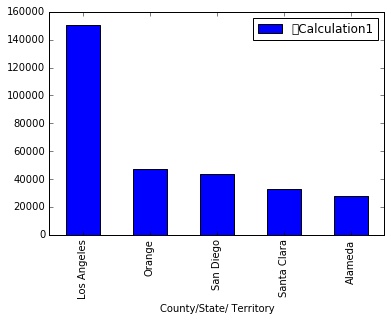

In [80]:
freshmen_unique_dropped = freshmen_unique_count.drop(['Campus', 'City', 'Fall Term', 'School', 'Sch Src FR', 'Uad Uc Ethn 6 Cat', 'adm (SUM)', 'app (SUM)', 'enr (SUM)'], axis=1)
freshmen_unique_dropped[0:5].plot.bar()

Schools with highest admission rate according to table

In [22]:
combined_fresh = freshmen.groupby("School").sum()
series_f = combined_fresh['adm (SUM)']/combined_fresh['app (SUM)']
series_f.sort_values(ascending=False).head()

School
MAXWELL HIGH SCHOOL         1.0
JENSEN BEACH HIGH SCHOOL    1.0
PORTER-GAUD SCHOOL          1.0
GRANTS PASS HIGH SCHOOL     1.0
EL SERENO HIGH SCHOOL       1.0
dtype: float64

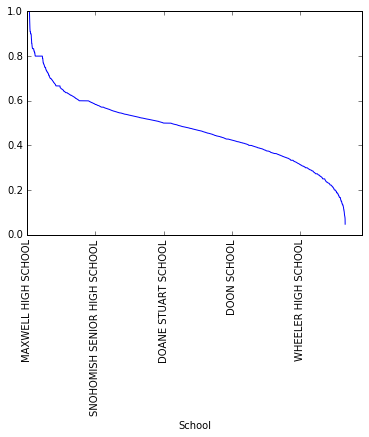

In [99]:
series_f.sort_values(ascending=False).plot.line(rot = 90)

In [23]:
freshmen.loc[freshmen['School'] == "MAXWELL HIGH SCHOOL"]

,﻿Calculation1,Campus,City,County/State/ Territory,Fall Term,School,Sch Src FR,Uad Uc Ethn 6 Cat,adm (SUM),app (SUM),enr (SUM)
60279,MAXWELL HIGH SCHOOL51930,Universitywide,Maxwell,Colusa,2003,MAXWELL HIGH SCHOOL,California Public High School,All,5.0,5,3.0
200997,MAXWELL HIGH SCHOOL51930,Universitywide,Maxwell,Colusa,2010,MAXWELL HIGH SCHOOL,California Public High School,All,5.0,5,NaN
363148,MAXWELL HIGH SCHOOL51930,Davis,Maxwell,Colusa,2003,MAXWELL HIGH SCHOOL,California Public High School,All,5.0,5,NaN


In [24]:
combined_transfers = transfers.groupby("School").sum()
series_t = combined_transfers['adm (SUM)']/combined_transfers['app (SUM)']
series_t.sort_values(ascending=False).head()

School
INTRNATL CHRISTIAN UNIV JAPAN    1.000000
UC LOS ANGELES HONORS PROG       1.000000
UC BERKELEY SUMMER SESSION       1.000000
INSTITUTION IN EUROPE            0.945133
YAVAPAI COLLEGE                  0.944444
dtype: float64

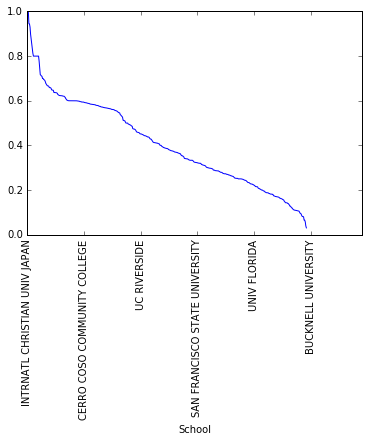

In [100]:
series_t.sort_values(ascending=False).plot.line(rot = 90)

In [25]:
transfers.loc[transfers['School'] == "INTRNATL CHRISTIAN UNIV JAPAN"]

,﻿Calculation1,Campus,City,County/State/ Territory,Fall Term,School,Sch Src TR,Uad Uc Ethn 6 Cat,adm (SUM),app (SUM),enr (SUM)
21526,INTRNATL CHRISTIAN UNIV JAPAN860,Universitywide,NaN,JAPAN,1994,INTRNATL CHRISTIAN UNIV JAPAN,Foreign Institution,Inter- national,12.0,12,10.0
39443,INTRNATL CHRISTIAN UNIV JAPAN860,Universitywide,NaN,JAPAN,1994,INTRNATL CHRISTIAN UNIV JAPAN,Foreign Institution,All,14.0,14,12.0
72508,INTRNATL CHRISTIAN UNIV JAPAN860,Irvine,NaN,JAPAN,1994,INTRNATL CHRISTIAN UNIV JAPAN,Foreign Institution,All,10.0,10,10.0


Finds highschools with highest admissions rates per campus

In [26]:
combined_f_p_univ = freshmen.groupby(["Campus", "School"]).sum()
series_f_p_univ = (combined_f_p_univ['adm (SUM)']/combined_f_p_univ['app (SUM)'])
combined_t_p_univ = transfers.groupby(["Campus", "School"]).sum()
series_t_p_univ = combined_t_p_univ['adm (SUM)']/combined_t_p_univ['app (SUM)']

In [27]:
print("Berkeley")
series_f_p_univ["Berkeley"].sort_values(ascending=False).head()

Berkeley


School
HORIZON CHARTER SCHOOL       1.000000
GRAFTON HIGH SCHOOL          1.000000
ST MATTHAIS HIGH SCH         0.937500
ACADEMY FOR BUS & FINANCE    0.869565
DAVIDSON ACADEMY             0.833333
dtype: float64

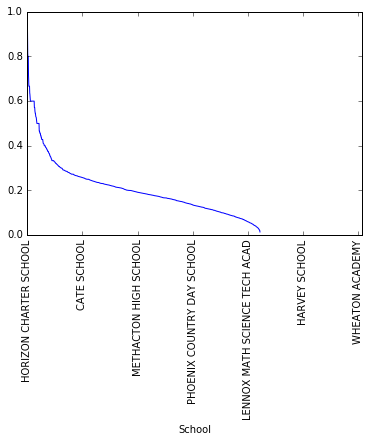

In [101]:
series_f_p_univ["Berkeley"].sort_values(ascending=False).plot.line(rot = 90)

In [28]:
series_t_p_univ["Berkeley"].sort_values(ascending=False).head()

School
UC BERKELEY SUMMER SESSION        1.000000
SCIENCES PO-PARIS INST PO STUD    0.944444
UNITED STATES AIR FORCE ACAD      0.800000
DEEP SPRINGS COLL                 0.666667
WESTMONT COLLEGE                  0.600000
dtype: float64

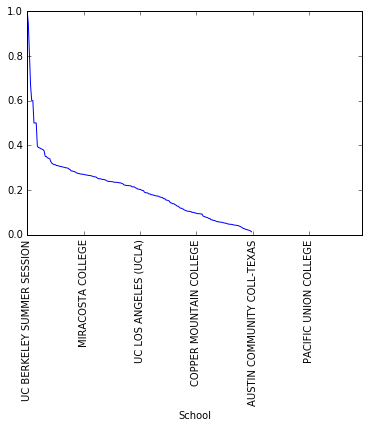

In [102]:
series_t_p_univ["Berkeley"].sort_values(ascending=False).plot.line(rot = 90)

In [29]:
print("Riverside")
series_f_p_univ["Riverside"].sort_values(ascending=False).head()

Riverside


School
MOUNT DIABLO HIGH SCHOOL          1.0
INTERNATIONAL CHRISTIAN SCHOOL    1.0
ARMENIAN MESROBIAN HIGH SCHOOL    1.0
SAINT MICHAELS PREP SCHOOL        1.0
CASTILLEJA SCHOOL                 1.0
dtype: float64

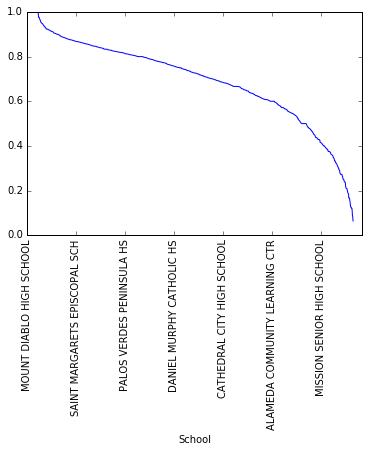

In [103]:
series_f_p_univ["Riverside"].sort_values(ascending=False).plot.line(rot = 90)

In [30]:
series_t_p_univ["Riverside"].sort_values(ascending=False).head()

School
HIGHLINE COMMUNITY COLLEGE    1.000000
COLLEGE OF THE REDWOODS       0.900000
UNIV SAN DIEGO                0.900000
MENDOCINO COLLEGE             0.833333
COLUMBIA COLLEGE              0.833333
dtype: float64

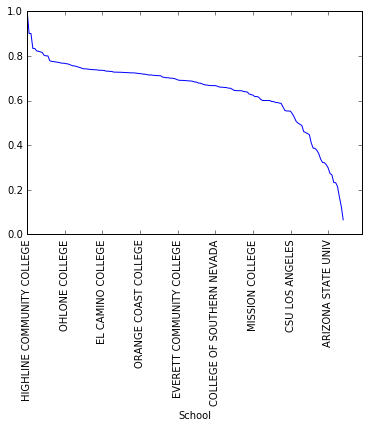

In [104]:
series_t_p_univ["Riverside"].sort_values(ascending=False).plot.line(rot = 90)

In [31]:
print("Santa Barbara")
series_f_p_univ["Santa Barbara"].sort_values(ascending=False).head()

Santa Barbara


School
OLYMPIA HIGH SCHOOL            1.0
CEDARCREST HIGH SCHOOL         1.0
LAKE NORMAN HIGH SCHOOL        1.0
JOEL E FERRIS HIGH SCHOOL      1.0
SANTA FE PREPARATORY SCHOOL    1.0
dtype: float64

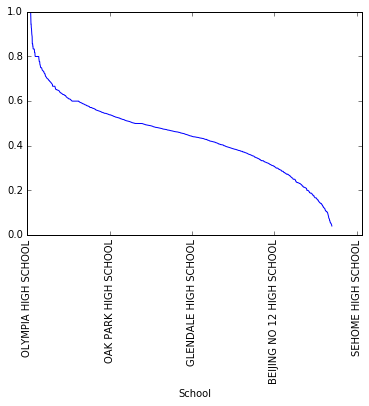

In [105]:
series_f_p_univ["Santa Barbara"].sort_values(ascending=False).plot.line(rot = 90)

In [32]:
series_t_p_univ["Santa Barbara"].sort_values(ascending=False).head()

School
UNIV VERMONT                       1.000000
YAVAPAI COLLEGE                    1.000000
TACOMA COMMUNITY COLLEGE           1.000000
UC SANTA BARBARA SUMMER SESSION    0.948637
UC SANTA BARBARA                   0.838592
dtype: float64

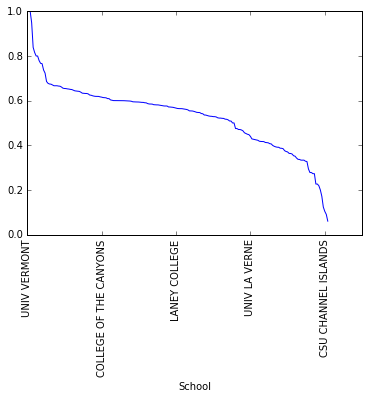

In [106]:
series_t_p_univ["Santa Barbara"].sort_values(ascending=False).plot.line(rot = 90)

In [33]:
print("San Diego")
series_f_p_univ["San Diego"].sort_values(ascending=False).head()

San Diego


School
SHAWNEE MISSION EAST HS           1.0
MCDONOGH SCHOOL                   1.0
POINT ARENA HIGH SCHOOL           1.0
ARSHAG DICKRANIAN ARMENIAN SCH    1.0
KALAHEO HIGH SCHOOL               1.0
dtype: float64

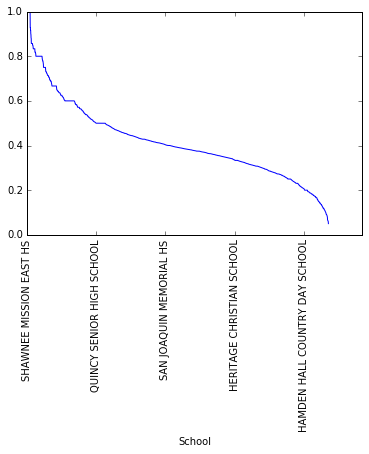

In [107]:
series_f_p_univ["San Diego"].sort_values(ascending=False).plot.line(rot = 90)

In [34]:
series_t_p_univ["San Diego"].sort_values(ascending=False).head()

School
KAPIOLANI COMMUNITY COLLEGE    0.800000
CUYAMACA COLLEGE               0.673105
MIRACOSTA COLLEGE              0.668096
GROSSMONT CMTY COLLEGE         0.652926
SAN DIEGO MIRAMAR COLLEGE      0.649460
dtype: float64

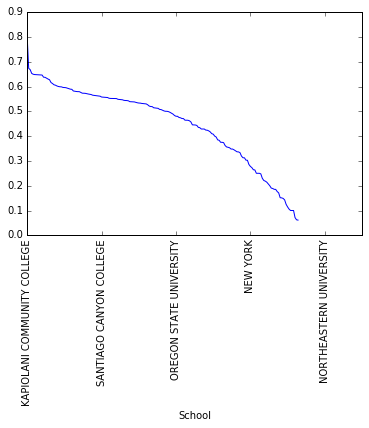

In [108]:
series_t_p_univ["San Diego"].sort_values(ascending=False).plot.line(rot = 90)

In [35]:
print("Merced")
series_f_p_univ["Merced"].sort_values(ascending=False).head()

Merced


School
CONVENT OF THE SACRED HEART HS    1.0
COLFAX HIGH SCHOOL                1.0
STUART HALL HIGH SCHOOL           1.0
SOUTHLANDS CHRISTIAN HS           1.0
LIVERMORE VALLEY CHARTER PREP     1.0
dtype: float64

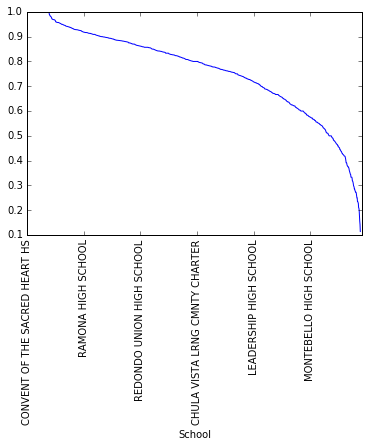

In [109]:
series_f_p_univ["Merced"].sort_values(ascending=False).plot.line(rot = 90)

In [36]:
series_t_p_univ["Merced"].sort_values(ascending=False).head()

School
UC SAN DIEGO               1.000000
IMPERIAL VALLEY COLLEGE    1.000000
YUBA COLLEGE               0.916667
UC BERKELEY                0.902439
UC DAVIS                   0.897436
dtype: float64

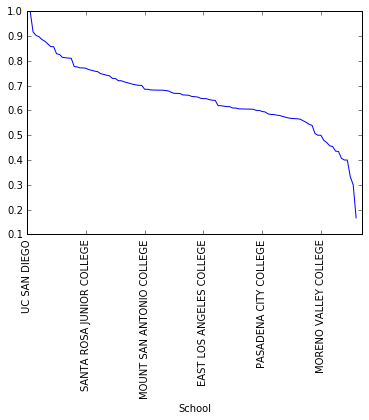

In [110]:
series_t_p_univ["Merced"].sort_values(ascending=False).plot.line(rot = 90)

In [37]:
print("Los Angeles")
series_f_p_univ["Los Angeles"].sort_values(ascending=False).head()

Los Angeles


School
DAVIDSON ACADEMY               1.000000
ACADEMY FOR BUS & FINANCE      1.000000
BASIS ORO VALLEY               0.923077
SPRUCE CREEK HIGH SCHOOL       0.875000
STANTON COLLEGE PREP SCHOOL    0.857143
dtype: float64

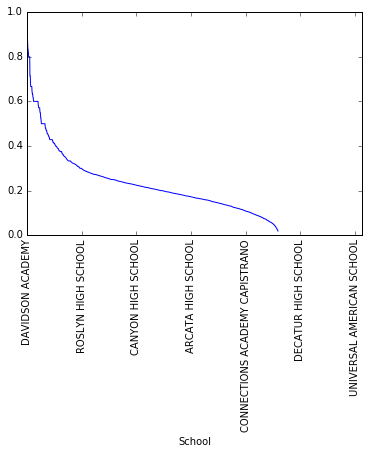

In [111]:
series_f_p_univ["Los Angeles"].sort_values(ascending=False).plot.line(rot = 90)

In [38]:
series_t_p_univ["Los Angeles"].sort_values(ascending=False).head()

School
VILLANOVA UNIVERSITY    0.800000
VINCENNES UNIVERSITY    0.600000
WEST COAST UNIV         0.600000
WESTMONT COLLEGE        0.583333
TUFTS UNIVERSITY        0.500000
dtype: float64

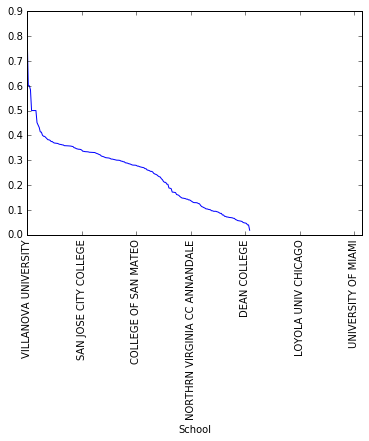

In [112]:
series_t_p_univ["Los Angeles"].sort_values(ascending=False).plot.line(rot = 90)

In [39]:
print("Davis")
series_f_p_univ["Davis"].sort_values(ascending=False).head()

Davis


School
SHENGLI NO 1 HS DONGYING       1.0
BENSON POLYTECH HIGH SCHOOL    1.0
MODOC HIGH SCHOOL              1.0
TAIPEI EUROPEAN SCHOOL         1.0
MAXWELL HIGH SCHOOL            1.0
dtype: float64

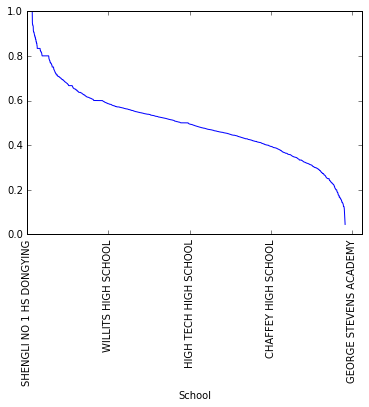

In [113]:
series_f_p_univ["Davis"].sort_values(ascending=False).plot.line(rot = 90)

In [40]:
series_t_p_univ["Davis"].sort_values(ascending=False).head()

School
ALBRIGHT COLLEGE             1.000000
UNIVERSITY OF PUGET SOUND    1.000000
CORNELL UNIVERSITY           1.000000
PACIFIC UNION COLLEGE        1.000000
COPPER MOUNTAIN COLLEGE      0.777778
dtype: float64

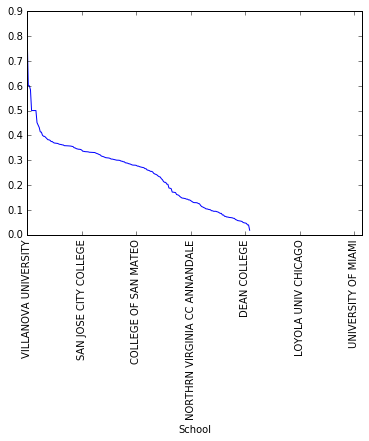

In [114]:
series_t_p_univ["Los Angeles"].sort_values(ascending=False).plot.line(rot = 90)

In [41]:
print("Universitywide")
series_f_p_univ["Universitywide"].sort_values(ascending=False).head()

Universitywide


School
SEOUL FOREIGN LANGUAGE HS         1.0
INTERNATIONAL BILINGUAL TAINAN    1.0
LEON M GOLDSTEIN HS/SCIENCES      1.0
GRANTS PASS HIGH SCHOOL           1.0
CENTRAL BUCKS HIGH SCH SOUTH      1.0
dtype: float64

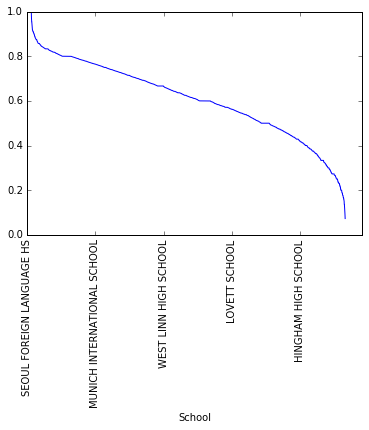

In [115]:
series_f_p_univ["Universitywide"].sort_values(ascending=False).plot.line(rot = 90)

In [42]:
series_t_p_univ["Universitywide"].sort_values(ascending=False).head()

School
INTRNATL CHRISTIAN UNIV JAPAN    1.000000
UC LOS ANGELES HONORS PROG       1.000000
UC BERKELEY SUMMER SESSION       1.000000
INSTITUTION IN EUROPE            0.965487
GRACE CHRISTIAN COLLEGE          0.929936
dtype: float64

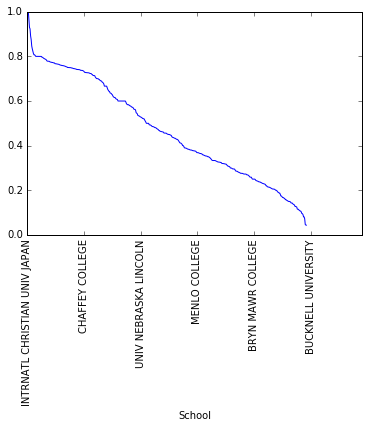

In [116]:
series_t_p_univ["Universitywide"].sort_values(ascending=False).plot.line(rot = 90)

In [43]:
print("Irvine")
series_f_p_univ["Irvine"].sort_values(ascending=False).head()

Irvine


School
SILVER VALLEY HIGH SCHOOL         1.0
MOUNTAIN RIDGE HIGH SCHOOL        1.0
NINGBO YINZHOU HIGH SCHOOL        1.0
BEIJING NO 8 HIGH SCHOOL YIHAI    1.0
RANDOLPH MACON ACADEMY            1.0
dtype: float64

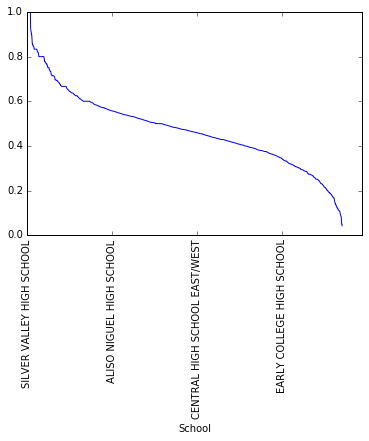

In [117]:
series_f_p_univ["Irvine"].sort_values(ascending=False).plot.line(rot = 90)

In [44]:
series_t_p_univ["Irvine"].sort_values(ascending=False).head()

School
INTRNATL CHRISTIAN UNIV JAPAN      1.000000
INSTITUTION IN EUROPE              0.924779
CALIF BAPTIST UNIVERSITY           0.800000
UC SANTA BARBARA SUMMER SESSION    0.722222
COLLEGE OF THE REDWOODS            0.710526
dtype: float64

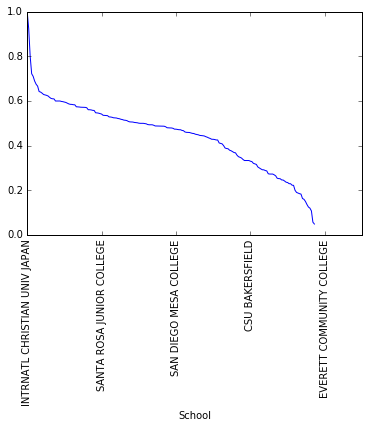

In [118]:
series_t_p_univ["Irvine"].sort_values(ascending=False).plot.line(rot = 90)

In [45]:
print("Santa Cruz")
series_f_p_univ["Santa Cruz"].sort_values(ascending=False).head()

Santa Cruz


School
LINCOLN PARK HIGH SCHOOL         1.0
QATAR ACADEMY                    1.0
MOJAVE HIGH SCHOOL               1.0
EXCEL COLLEGE PREPARATORY HS     1.0
TAIPEI WEGO PRIVATE SENIOR HS    1.0
dtype: float64

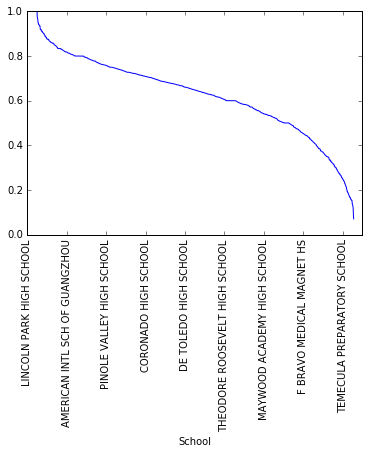

In [119]:
series_f_p_univ["Santa Cruz"].sort_values(ascending=False).plot.line(rot = 90)

In [46]:
series_t_p_univ["Santa Cruz"].sort_values(ascending=False).head()

School
UNIV NEW MEXICO ALBUQUERQUE    1.0
BARD COLLEGE AT SIMONS ROCK    1.0
COLORADO COLLEGE               1.0
UNIVERSITY OF PUGET SOUND      1.0
UNIV MICHIGAN ANN ARBOR        1.0
dtype: float64

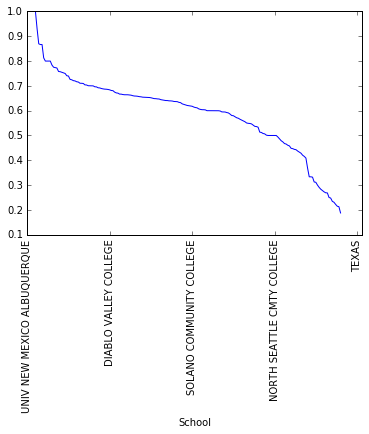

In [120]:
series_t_p_univ["Santa Cruz"].sort_values(ascending=False).plot.line(rot = 90)